<a href="https://colab.research.google.com/github/Antsruin/Machine_Learning_Codes/blob/master/ML_Ass2_Shubham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, AveragePooling2D,BatchNormalization
from tensorflow.keras.utils import to_categorical

In [14]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

## **Ans 1** : Size of the images in MNIST dataset




In [15]:
print("Shape of images in x_train:", x_train.shape[1:3])
print("Shape of images in x_test:", x_test.shape[1:3])


Shape of images in x_train: (28, 28)
Shape of images in x_test: (28, 28)


# **Ans 1b**: Visualizing 4 random images from training set

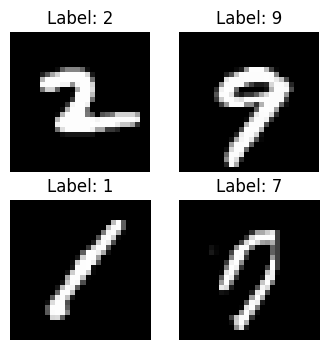

In [16]:
plt.figure(figsize=(4, 4))
for i in range(4):
    plt.subplot(2, 2, i+1)
    idx = np.random.randint(len(x_train))
    plt.imshow(x_train[idx], cmap='gray')
    plt.title(f"Label: {y_train[idx]}")
    plt.axis('off')
plt.show()


# **Ans 1b**: Visualizing 4 random images from test set

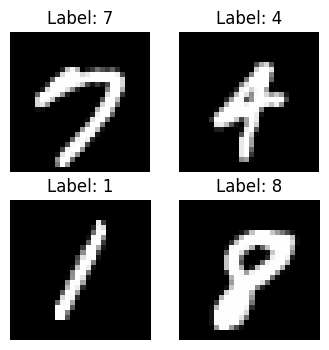

In [17]:
plt.figure(figsize=(4, 4))
for i in range(4):
    plt.subplot(2, 2, i+1)
    idx = np.random.randint(len(x_test))
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Label: {y_test[idx]}")
    plt.axis('off')
plt.show()


# **Ans 2**: Number of Images

In [18]:
print("Number of training images:", len(x_train))
print("Number of testing images:", len(x_test))

Number of training images: 60000
Number of testing images: 10000


#**Preprocessing Step**


In [19]:
#reshaping and dividing by 255 to make the element of matrix in [0,1]
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


In [20]:
# One-hot encoding the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

#**Ans: 3 to 8**

In [21]:
model = Sequential([
     # Ans3
    Conv2D(8, (3, 3), strides=(2, 2), activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),

     # Ans 4
    AveragePooling2D((2, 2)),

    # Ans 5
    Conv2D(16, (3, 3), padding='same', activation='relu'),
    BatchNormalization(),

    # Ans 6
    MaxPooling2D((2, 2)),

    # Ans 7
    Conv2D(4, (1, 1), activation='relu'),
    BatchNormalization(),

    #Ans 8
    Flatten(),
    Dense(10, activation='softmax')
])

#Model Summary
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 8)           │              80 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 13, 8)           │              32 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_1                  │ (None, 6, 6, 8)             │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 6, 6, 16)            │           1,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 6, 6, 16)            │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 3, 3, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 3, 3, 4)             │              68 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 3, 3, 4)             │              16 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 36)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             370 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,798 (7.02 KB)

 Trainable params: 1,742 (6.80 KB)

 Non-trainable params: 56 (224.00 B)


# **Ans 9**: Compile and fit


In [22]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 5ms/step - accuracy: 0.7408 - loss: 0.8414 - val_accuracy: 0.9549 - val_loss: 0.1480
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9539 - loss: 0.1541 - val_accuracy: 0.9648 - val_loss: 0.1093
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9641 - loss: 0.1157 - val_accuracy: 0.9708 - val_loss: 0.0919
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9711 - loss: 0.0916 - val_accuracy: 0.9732 - val_loss: 0.0856
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9728 - loss: 0.0848 - val_accuracy: 0.9741 - val_loss: 0.0847
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9771 - loss: 0.0749 - val_accuracy: 0.9770 - val_loss: 0.0722
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9780 - loss: 0.0696 - val_accuracy: 0.9743 - val_loss: 0.0804
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9793 - loss: 0.0659 -

# Plot train and Validation loss

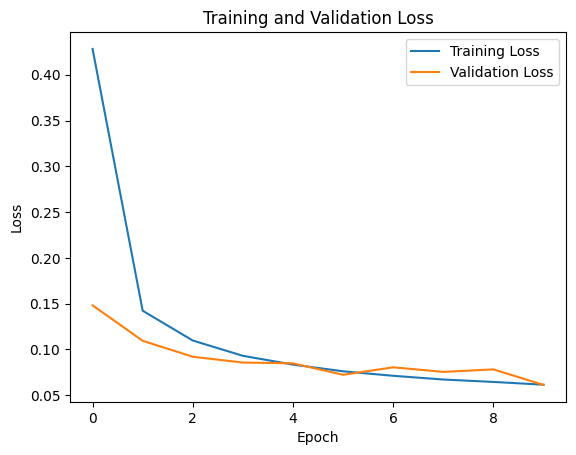

In [23]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# 10. Evaluating on test set

In [24]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc * 100:.2f}%')


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9769 - loss: 0.0687
Test accuracy: 98.00%
